In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, activations, optimizers, metrics, losses
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

In [2]:
os.listdir()

['.config',
 'train_data.npy',
 'train_target.npy',
 'test_target.npy',
 'test_data.npy',
 'sample_data']

In [3]:
# numpy data 불러오기
train_data = np.load("train_data.npy")
train_target = np.load("train_target.npy")
test_data = np.load("test_data.npy")
test_target = np.load("test_target.npy")

In [4]:
# numpy data 저장
np.save("train_data_2.npy", train_data)
np.save("train_target_2.npy", train_target)
np.save("test_data_2.npy", test_data)
np.save("test_target_2.npy", test_target)

In [5]:
train_data.shape, train_target.shape, test_data.shape, test_target.shape

((314, 9), (314,), (78, 9), (78,))

In [ ]:
X=np.array([[1,2,3,4,5,6,7,8,9]]) # 공부하는 시간
y=np.array([[11],[22],[33],[44],[53],[66],[77],[87],[95]]) # 각 공부하는 시간에 맵핑되는 성적

In [ ]:
# y = np.random.randint(low=0,high=100,size=(100,1))

## Scaling

In [ ]:
# scaling
s_scale = StandardScaler()
m_scale = MinMaxScaler()
r_scale = RobustScaler()

In [ ]:
y.shape

(9, 1)

In [ ]:
s_scaled = s_scale.fit_transform(y)
m_scaled = m_scale.fit_transform(y)
r_scaled = r_scale.fit_transform(y)

In [ ]:
s_scaled

array([[-1.56582665],
       [-1.16732578],
       [-0.76882491],
       [-0.37032404],
       [-0.04427787],
       [ 0.4266777 ],
       [ 0.82517857],
       [ 1.18745208],
       [ 1.4772709 ]])

In [ ]:
m_scaled

array([[0.        ],
       [0.13095238],
       [0.26190476],
       [0.39285714],
       [0.5       ],
       [0.6547619 ],
       [0.78571429],
       [0.9047619 ],
       [1.        ]])

In [ ]:
r_scaled

array([[-0.95454545],
       [-0.70454545],
       [-0.45454545],
       [-0.20454545],
       [ 0.        ],
       [ 0.29545455],
       [ 0.54545455],
       [ 0.77272727],
       [ 0.95454545]])

# Encoding

In [ ]:
# one-hot
df = pd.DataFrame()

In [ ]:
df["국가"] = ['한국', "일본", "중국", "미국", "영국"]

In [ ]:
df

,국가
0,한국
1,일본
2,중국
3,미국
4,영국


In [ ]:
# pandas 이용 one-hot
one_hot_df = pd.get_dummies(df, columns=["국가"])

In [ ]:
one_hot_df

,국가_미국,국가_영국,국가_일본,국가_중국,국가_한국
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,1,0,0,0


In [ ]:
# sklearn 이용
one_hot = OneHotEncoder()
one_hot_obj = one_hot.fit_transform(df["국가"].values.reshape(-1,1))
one_hot_arr = one_hot_obj.toarray()
one_hot_arr

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# 노가다스러운 방법
nogada_df = df.copy()
nogada_df["한국"] = nogada_df["국가"].apply(lambda x : 1 if x == "한국" else 0)
nogada_df["일본"] = nogada_df["국가"].apply(lambda x : 1 if x == "일본" else 0)
nogada_df["중국"] = nogada_df["국가"].apply(lambda x : 1 if x == "중국" else 0)
nogada_df["미국"] = nogada_df["국가"].apply(lambda x : 1 if x == "미국" else 0)
nogada_df["영국"] = nogada_df["국가"].apply(lambda x : 1 if x == "영국" else 0)
nogada_df = nogada_df.drop("국가", axis=1)
nogada_df

,한국,일본,중국,미국,영국
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [ ]:
# label encoding
# sklearn
label = LabelEncoder()
label_arr = label.fit_transform(df["국가"])
label_arr 

array([4, 2, 3, 0, 1])

In [ ]:
label.classes_

array(['미국', '영국', '일본', '중국', '한국'], dtype=object)

In [ ]:
df["국가"]

0    한국
1    일본
2    중국
3    미국
4    영국
Name: 국가, dtype: object

In [ ]:
# 노가다 
nogada_df = df.copy()
nogada_df["국가"] = nogada_df["국가"].map({"한국": 0, "일본": 1, "중국": 2, "미국": 3, "영국": 4})
nogada_df

,국가
0,0
1,1
2,2
3,3
4,4


## 다양한 Activation

In [ ]:
# relu = activations.relu(x)
# elu = activations.elu(x)
# gelu = activations.gelu(x)
# sigmoid = activations.sigmoid(x)
# softmax = activations.softmax(x)
relu = layers.Activation("relu")
elu = layers.Activation("elu")
gelu = layers.Activation("gelu")
sigmoid = layers.Activation("sigmoid")
softmax = layers.Activation("softmax")

## 다양한 Optimizer

In [ ]:
sgd = optimizers.SGD()
adadelta = optimizers.Adadelta()
rmsprop = optimizers.RMSprop()
adagrad = optimizers.Adagrad()
adam = optimizers.Adam()

## 다양한 Loss

In [ ]:
bce = losses.BinaryCrossentropy()
cce = losses.CategoricalCrossentropy()
spe = losses.SparseCategoricalCrossentropy()
mse = losses.MeanSquaredError()
mae = losses.MeanAbsoluteError()

## 다양한 Metrics

In [ ]:
acc =metrics.Accuracy()
bce =metrics.BinaryCrossentropy()
cce = metrics.CategoricalCrossentropy()
sce =metrics.SparseCategoricalCrossentropy()
mae =metrics.MeanAbsoluteError()
mse =metrics.MeanSquaredError()
rmse =metrics.RootMeanSquaredError()

## 모델 만들기

In [ ]:
# Sequential
sequential_model = keras.Sequential([
    layers.Dense(64, kernel_initializer="he_normal", input_shape=(train_data.shape[1],), activation="relu"),
    layers.Dense(64, kernel_initializer="he_normal", activation='relu'),
    layers.Dense(32, kernel_initializer="he_normal", activation="relu"),
    layers.Dense(1)                                     
])

In [ ]:
sequential_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
_________________________________________________________________


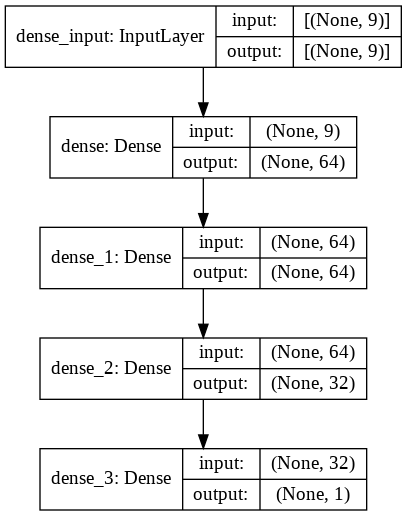

In [ ]:
plot_model(sequential_model, show_shapes=True)

In [ ]:
# Funtional
input_ = layers.Input(shape=(train_data.shape[1],))
x = layers.Dense(64, kernel_initializer="he_normal", activation="relu")(input_)
x = layers.Dense(64, kernel_initializer="he_normal", activation="relu")(x)
x = layers.Dense(32, kernel_initializer="he_normal", activation="relu")(x)
output = layers.Dense(1)(x)

functional_model = keras.Model(input_, output)


In [ ]:
functional_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
_________________________________________________________________


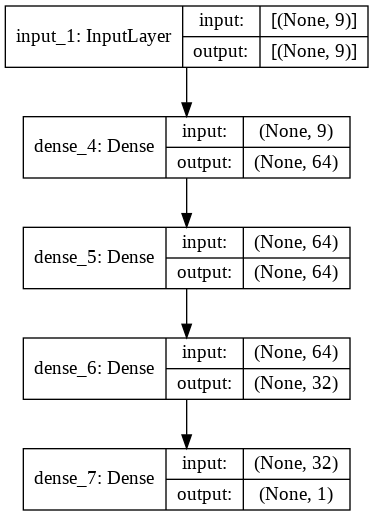

In [ ]:
plot_model(functional_model, show_shapes=True)

In [ ]:
# functional
input_ = keras.layers.Input(train_data.shape[1])
x_1 = keras.layers.Dense(32, activation="relu")(input_)
x_2 = keras.layers.Dense(32, activation="relu")(x_1)
print(x_2.shape)
concat = keras.layers.Concatenate()([input_, x_2])
print(concat.shape)
output = keras.layers.Dense(1)(concat)
functional_model = keras.Model(input_, output)

(None, 32)
(None, 41)


In [ ]:
functional_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 9)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 32)           320         input_5[0][0]                    
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 32)           1056        dense_15[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 41)           0           input_5[0][0]                    
                                                                 dense_16[0][0]             

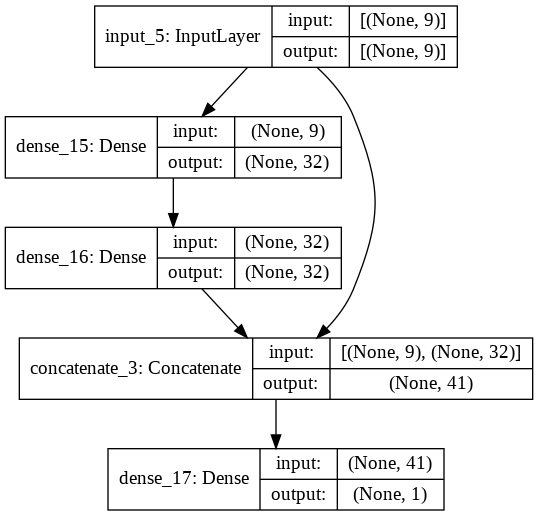

In [ ]:
plot_model(functional_model, show_shapes=True)

In [ ]:
# subclassing
class SubclassingModel(keras.Model):
    def __init__(self, units=32, activation="relu"):
        super().__init__()
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.output_ = keras.layers.Dense(1) # output 이라는 변수명 사용불가
    
    # input 레이어 만들필요없음
    def call(self, inputs):
        hidden1 = self.hidden1(inputs)
        hidden2 = self.hidden2(hidden1)
        output = self.output_(hidden2)
        return output

In [ ]:
subclass =SubclassingModel()

In [ ]:
subclass.compile(
    loss="mse",
    optimizer="adam",
    metrics=["mae"]
)

In [ ]:
subclass.fit(train_data, train_target, epochs=1)

10/10 [==============================] - 0s 3ms/step - loss: 580.0695 - mae: 22.7725


In [ ]:
# 서브클래스는 학습 후에 summary를 찍어볼 수 있음
subclass.summary()

Model: "subclassing_model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             multiple                  320       
_________________________________________________________________
dense_30 (Dense)             multiple                  1056      
_________________________________________________________________
dense_31 (Dense)             multiple                  33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________
